## Outliers

In [1]:
# Numerical ararys
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as ss

## What is an outlier?

## The Normal Distribution -  Scaling


***

$$ \frac{1}{\sqrt{2 \pi \sigma^2}} $$

In [2]:
np.pi

3.141592653589793

In [3]:
np.sqrt(2)

1.4142135623730951

In [4]:
sigma = 1.0

In [5]:
1.0 / np.sqrt(2 *np.pi * sigma**2)

0.3989422804014327

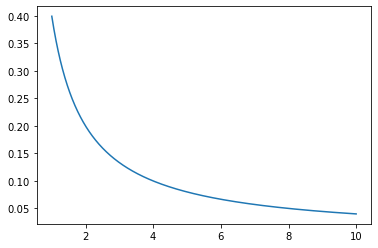

In [6]:
sigma_vals = np.linspace(1.0, 10.0, 1000)

plt.plot(sigma_vals, 1.0 / np.sqrt(2 *np.pi * sigma_vals**2))

## The Normal Distribution - $e^x$

***

$$ e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$


In [7]:
np.e

2.718281828459045

([<matplotlib.lines.Line2D at 0x2511efcb3d0>],)

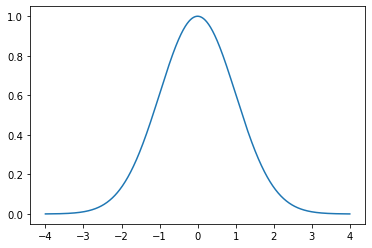

In [8]:
x = np.linspace(-4.0, 4.0, 1000)

# plt.plot(x, 1.0 / np.exp(-x), label=r'$1.0 / e^x$')
plt.plot(x, np.exp(-(x**2 / 2))), # label=r'$e^{-x}$')


# plt.legend();

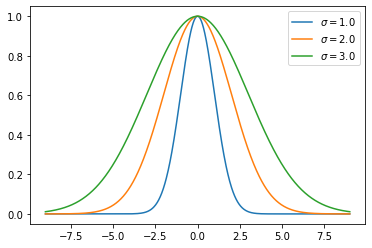

In [9]:
mu, sigma = 0.0, 3.0

x = np.linspace(-9.0, 9.0, 1000)

for sigma in [1.0, 2.0, 3.0]:
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\sigma = {sigma}$')
plt.legend();

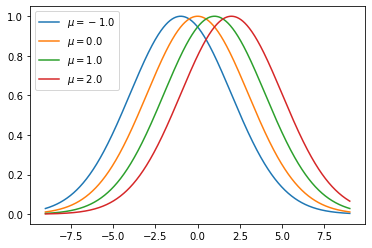

In [10]:
mu, sigma = 0.0, 3.0

x = np.linspace(-9.0, 9.0, 1000)

for mu in [-1.0, 0.0, 1.0, 2.0]:
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\mu = {mu}$')
plt.legend();

## Normal Distribution - All Together

***

$$ \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

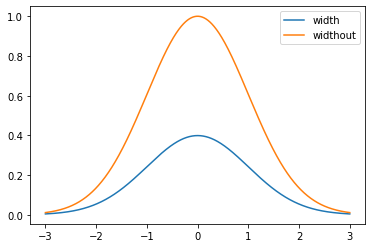

In [11]:
mu, sigma = 0.0, 1.0

x = np.linspace(-3.0, 3.0, 1000)
part1 = 1.0 / np.sqrt(2 *np.pi * sigma**2)
part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
y = part1 * part2


plt.plot(x, y, label = 'width')
plt.plot(x, part2, label = 'widthout')

plt.legend();

## Percentiles

In [12]:
np.random.normal(0.0, 1.0)

0.5287465444692604

In [13]:
ss.norm().ppf(0.50)

0.0

In [14]:
ss.norm().ppf(0.99)

2.3263478740408408

In [15]:
ss.norm().cdf(0.0)

0.5

In [16]:
ss.norm().cdf(3.0) - ss.norm().cdf(-3.0)

0.9973002039367398

## Quartiles

In [17]:
ss.norm().ppf(0.75)

0.6744897501960817

In [18]:
ss.norm().ppf(0.50)

0.0

In [19]:
ss.norm().ppf(0.25)

-0.6744897501960817

### Box Plots

***

In [49]:
# Read the morley data
data = np.genfromtxt('data/morley.csv', skip_header=1, delimiter=',')

# Remove the first column
data = data[:, 1:]

# select the data from the first experiment
exper_1 = data[:20, 2]
exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

In [21]:
# select the data from the seccond experiment
exper_2 = data[20:40, 2]
exper_2

array([960., 940., 960., 940., 880., 800., 850., 880., 900., 840., 830.,
       790., 810., 880., 880., 830., 800., 790., 760., 800.])

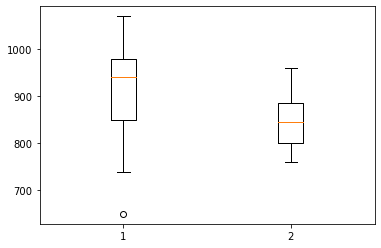

In [22]:
# Create a box plot
plt.boxplot(np.array([exper_1, exper_2]).T);

In [51]:
#  A quick way to get the 5 experiments in different columns
data[:, 2].reshape(5, 20).T

array([[ 850.,  960.,  880.,  890.,  890.],
       [ 740.,  940.,  880.,  810.,  840.],
       [ 900.,  960.,  880.,  810.,  780.],
       [1070.,  940.,  860.,  820.,  810.],
       [ 930.,  880.,  720.,  800.,  760.],
       [ 850.,  800.,  720.,  770.,  810.],
       [ 950.,  850.,  620.,  760.,  790.],
       [ 980.,  880.,  860.,  740.,  810.],
       [ 980.,  900.,  970.,  750.,  820.],
       [ 880.,  840.,  950.,  760.,  850.],
       [1000.,  830.,  880.,  910.,  870.],
       [ 980.,  790.,  910.,  920.,  870.],
       [ 930.,  810.,  850.,  890.,  810.],
       [ 650.,  880.,  870.,  860.,  740.],
       [ 760.,  880.,  840.,  880.,  810.],
       [ 810.,  830.,  840.,  720.,  940.],
       [1000.,  800.,  850.,  840.,  950.],
       [1000.,  790.,  840.,  850.,  800.],
       [ 960.,  760.,  840.,  850.,  810.],
       [ 960.,  800.,  840.,  780.,  870.]])

### Inter-Quartile Range

***

In [50]:
exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

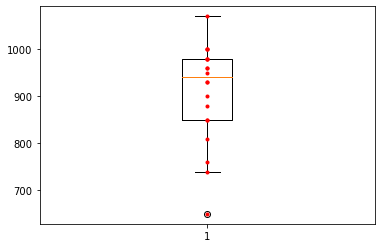

In [25]:
# Create a figure.
fig, ax = plt.subplots()

# Add the boxplot
ax.boxplot(exper_1)

# Plots red dots at (1, value) for each value in exper_1
ax.plot(np.ones(exper_1.shape), exper_1, 'r.');

In [26]:
# The values
exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

In [27]:
# the values but sorted
np.sort(exper_1)

array([ 650.,  740.,  760.,  810.,  850.,  850.,  880.,  900.,  930.,
        930.,  950.,  960.,  960.,  980.,  980.,  980., 1000., 1000.,
       1000., 1070.])

In [28]:
# Calculate the mean - tree ways.
exper_1.mean(), np.mean(exper_1), sum(exper_1) / len(exper_1)

(909.0, 909.0, 909.0)

In [29]:
# Median of exper_1
np.median(exper_1)

940.0

In [30]:
# the median is the 50th percentile
np.percentile(exper_1, 50)

940.0

In [31]:
# Upper quartile value
q3 = np.percentile(exper_1, 75)
q3

980.0

In [32]:
# Median of the top half of values.
np.median(np.sort(exper_1)[10:])

980.0

In [33]:
# Lower quartile value
q1 = np.percentile(exper_1, 25)

q1

850.0

In [34]:
# Median of bottom half of values
np.median(np.sort(exper_1)[:10])

850.0

In [35]:
# Inter-quartle range
iqr = np.percentile(exper_1, 75) - np.percentile(exper_1, 25)

iqr

130.0

In [36]:
# Max upper whisker
q3 + iqr

1110.0

In [37]:
# min lower whisker

q1 - iqr

720.0

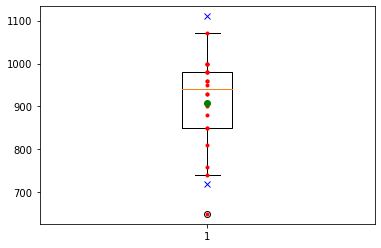

In [38]:
# Create a figure
fig, ax = plt.subplots()

# Add the boxplot
ax.boxplot(exper_1);

# Plots red dots at (1, value) for each value in exper_1.
ax.plot(np.ones(exper_1.shape), exper_1, 'r.');

# Add the max wisker lengths
ax.plot([1.0, 1.0], [q1 - iqr, q3 + iqr], 'bx');

# plot the mean
ax.plot([1.0], [np.mean(exper_1)], 'go');

In [39]:
# Values above the mean
exper_1[exper_1 > exper_1.mean()]

array([1070.,  930.,  950.,  980.,  980., 1000.,  980.,  930., 1000.,
       1000.,  960.,  960.])

In [40]:
# Values below the mean
exper_1[exper_1 < exper_1.mean()]

array([850., 740., 900., 850., 880., 650., 760., 810.])

#### Exercise 1

Create box plots on a single set of axes for all five experiments in the morley data set.

#### Exercise 2
Create box plots for all of the numercial variables in Fisher's Iris Data Set.

### A Data Set

***

In [41]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])

# Create a corresponding series of y vectors.
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

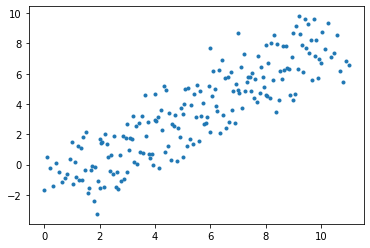

In [42]:
# Plot.
plt.plot(x, y, '.');

It looks like the points go from bottom left to top right.

Let's fit a best-fit straight line and see how it looks.

### Best Fit Line

***

In the next cell I am going to generate a set of numbers.

We will then plot and consider them.

y = mx +c

In [43]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x, y, 1)
m, c

(0.9165952358152227, -1.5359733689412924)

In [44]:
# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)

# Create corresponding y values form best fit line.
ybestfit = m * xbestfit + c

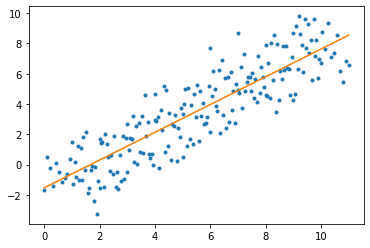

In [45]:
plt.plot(x, y, '.')
plt.plot(xbestfit, ybestfit);

### Colours

***

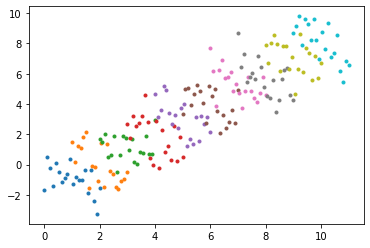

In [46]:
# Plot the same points but with different colour for each range
for i in range (len(xs)):
    plt.plot(xs[i], ys[i], '.')

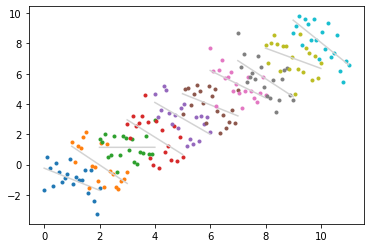

In [47]:
# Same plot but with best fit lines for each category
for i in range(len(xs)):
    # plot this category
    plt.plot(xs[i], ys[i], '.')
    # fit line to category
    m, c = np.polyfit(xs[i], ys[i], 1)
    # create steadily increasing x range for plot
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Coresponding y values based on best fit line
    ybestfit = m* xbestfit + c
    # plot best fit line for category
    plt.plot(xbestfit, ybestfit, color='lightgrey');

#### Exercise 3

Adapt the above code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.